# Find *closest* images

A k-Nearest Neighbors model is trained on the same data as the GAN (real images), takes a GAN-created image and finds the most lookalike real images.

In [1]:
import numpy as np

from keras.preprocessing import image
from os import walk
from PIL import Image
from sklearn.neighbors import NearestNeighbors

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


First, we'll define a function that takes a *patient type* (i.e. 'ad' or 'nor') and searches a direcroty (i.e. `data_dir`) for all images of that type. These images are loaded and stacked into a numpy array.

In [2]:
def get_array(pat_type, data_dir):
    pat_type_list = []

    for root, dirs, files in walk(data_dir):
                       
        if pat_type in root:
            for file in files:
                pat_type_list.append(root + '/' + file)
                
    pat_type_array = []
    
    for name in pat_type_list:
        img = image.load_img(name, grayscale = True)

        img_array = np.asarray(img).flatten()
        pat_type_array.append(img_array)

    pat_type_array = np.asarray(pat_type_array)

    return pat_type_array

Given a *type* of patients, load the images and train the model.

In [3]:
pat_type = "ad"
data_dir = "../../all/data_resized/data/train/"
epochs = 1000

x_train = get_array(pat_type, data_dir)
print(x_train.shape)

(28528, 30720)


In [4]:
neighs = NearestNeighbors()

neighs.fit(x_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

Load a random GAN-generated image and find its 5 nearest neighbors.

In [14]:
rand = np.random.randint(0,100)
print(rand)
img = image.load_img("gen_imgs/ad/1000/gen_ad_{}.png".format(rand), grayscale = True)
img = np.asarray(img).reshape(1, -1)
nn = neighs.kneighbors(img, 5, return_distance=False)

31


View the GAN image.

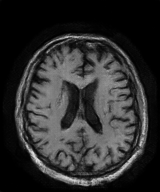

In [15]:
gan_img = Image.open("gen_imgs/ad/1000/gen_ad_{}.png".format(rand))
gan_img

View one of its nearest images.

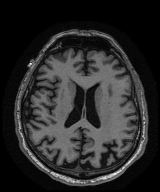

In [16]:
nearest = x_train[nn[0][0]]
nearest = nearest.reshape(192,160)
nearest_img = Image.fromarray(nearest)
nearest_img